In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, glob, re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math, json
from IPython.display import Image
from IPython.core.display import HTML 
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('max_colwidth', 400)

result_dir = os.path.join(os.getenv("CENSAI_PATH"), "results")
data_path = os.path.join(os.getenv("CENSAI_PATH"), "data")
models_path = os.path.join(os.getenv("CENSAI_PATH"), "models")

# Cosmos VAE First stage

In [16]:
hparams = pd.read_csv(os.path.join(result_dir, "VAE1_cosmos_HPARAMS.csv"), index_col=0)
histories = {}
for file in hparams["experiment_id"]:
    histories.update({file: pd.read_csv(os.path.join(result_dir, file + ".csv"), index_col=0).to_dict()})
hparams.sort_values(by="val_cost")

,layers,conv_layers,filter_scaling,filters,kernel_size,kernel_reg_amp,bias_reg_amp,activation,dropout_rate,batch_norm,latent_size,batch_size,total_items,optimizer,initial_learning_rate,decay_rate,beta_cyclical,skip_strength_init,skip_strength_decay_power,l2_bottleneck_decay_power,seed,experiment_id,train_cost,val_cost,best_score
29,3,4,2.0,16,3,0.0001,0.0001,leaky_relu,NaN,0,128,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_029_L3_CL4_F16_NLleaky_relu_LS128_ssi0.001_210810161842,7.385882,7.241856,6.089587
22,3,3,2.0,32,3,0.0001,0.0001,bipolar_relu,NaN,0,128,20,43990,Adam,0.0001,0.5,0,0.000,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_022_L3_CL3_F32_NLbipolar_relu_LS128_ssi0.0_210810161245,7.271799,7.263187,6.181999
17,3,3,2.0,32,3,0.0001,0.0001,leaky_relu,NaN,0,128,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_017_L3_CL3_F32_NLleaky_relu_LS128_ssi0.001_210810160109,7.291710,7.265431,5.921466
31,3,4,2.0,16,3,0.0001,0.0001,bipolar_relu,NaN,0,64,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_031_L3_CL4_F16_NLbipolar_relu_LS64_ssi0.001_210810162037,7.304929,7.277649,6.147605
14,3,3,2.0,32,3,0.0001,0.0001,leaky_relu,NaN,0,84,20,43990,Adam,0.0001,0.5,0,0.000,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_014_L3_CL3_F32_NLleaky_relu_LS84_ssi0.0_210810160109,7.220213,7.293100,5.807601
9,3,3,2.0,16,3,0.0001,0.0001,bipolar_relu,NaN,0,84,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_009_L3_CL3_F16_NLbipolar_relu_LS84_ssi0.001_210810154900,7.362319,7.302563,6.222132
24,3,4,2.0,16,3,0.0001,0.0001,leaky_relu,NaN,0,64,20,43990,Adam,0.0001,0.5,0,0.000,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_024_L3_CL4_F16_NLleaky_relu_LS64_ssi0.0_210810161258,7.335578,7.313291,6.130836
11,3,3,2.0,16,3,0.0001,0.0001,bipolar_relu,NaN,0,128,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_011_L3_CL3_F16_NLbipolar_relu_LS128_ssi0.001_210810155515,7.375835,7.332895,6.153264
7,3,3,2.0,16,3,0.0001,0.0001,bipolar_relu,NaN,0,64,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_007_L3_CL3_F16_NLbipolar_relu_LS64_ssi0.001_210810154900,7.310152,7.353315,6.055789
13,3,3,2.0,32,3,0.0001,0.0001,leaky_relu,NaN,0,64,20,43990,Adam,0.0001,0.5,0,0.001,0.5,0.5,NaN,VAE1_cosmos_HPARAMS_013_L3_CL3_F32_NLleaky_relu_LS64_ssi0.001_210810160109,7.205686,7.358805,5.841761


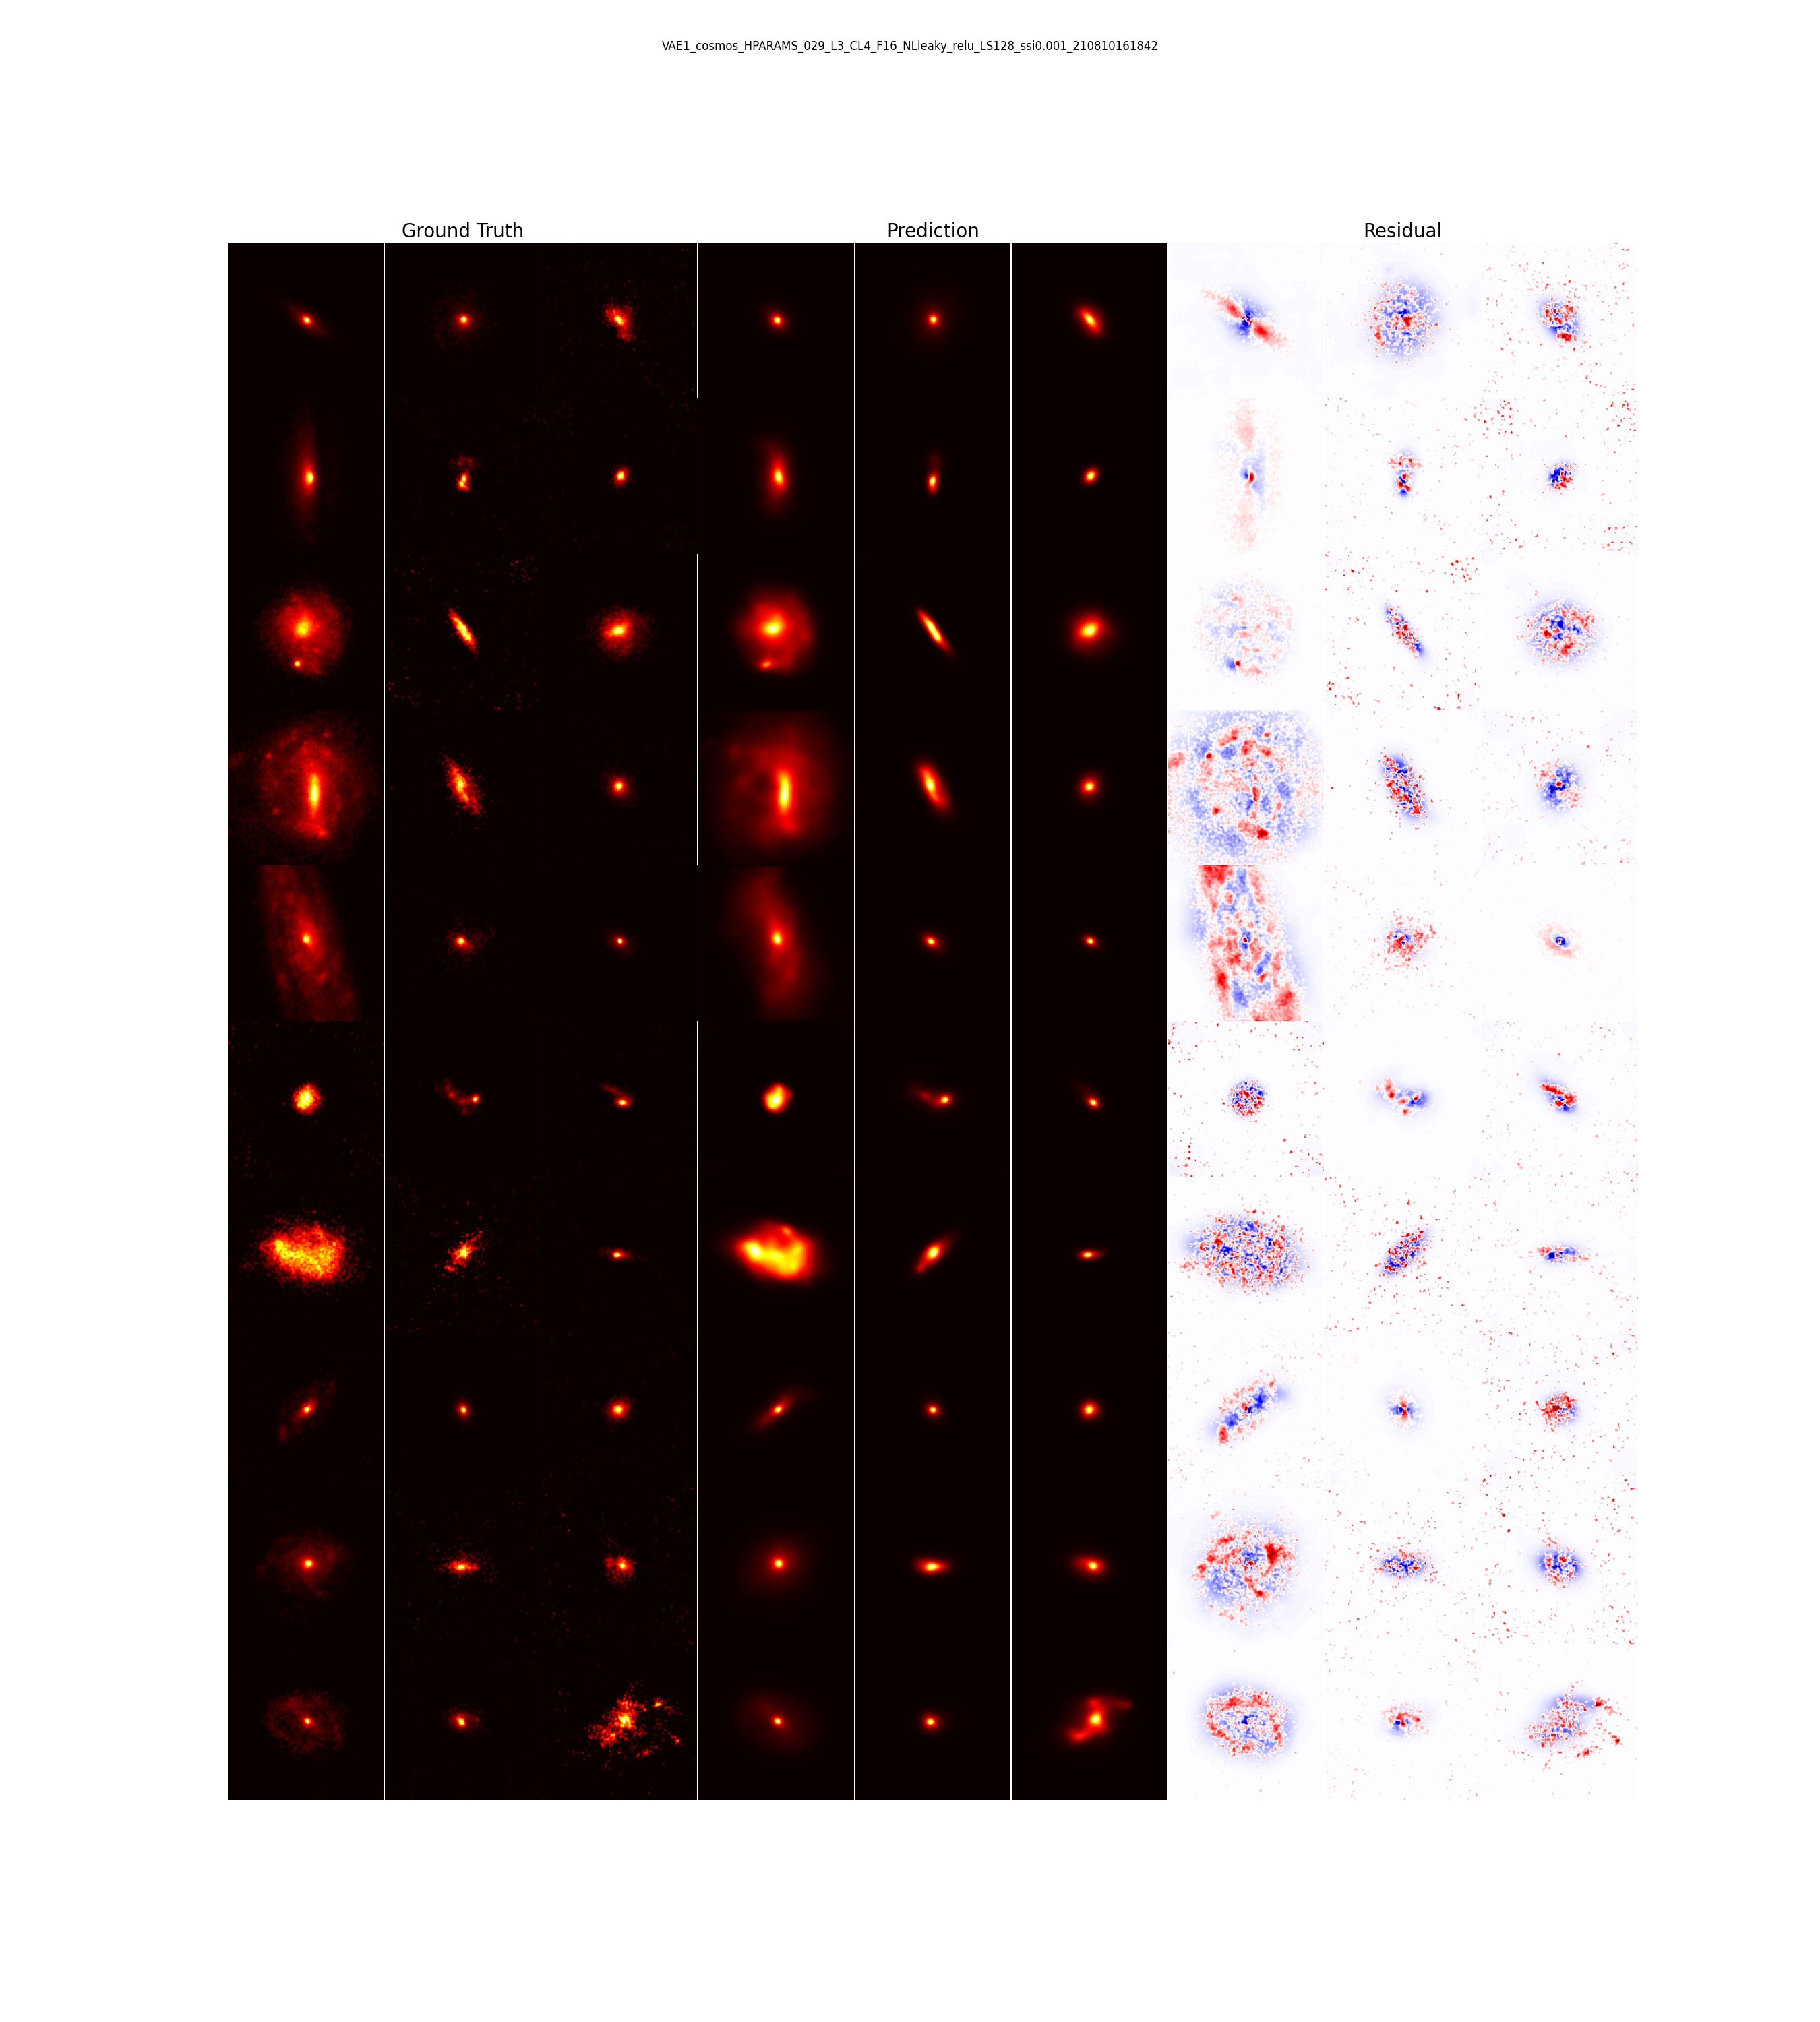

In [44]:
path = "../results/"
Image(filename = path + "vae_reconstruction_VAE1_cosmos_HPARAMS_029_L3_CL4_F16_NLleaky_relu_LS128_ssi0.001_210810161842__01.png", width=2000, height=4000)

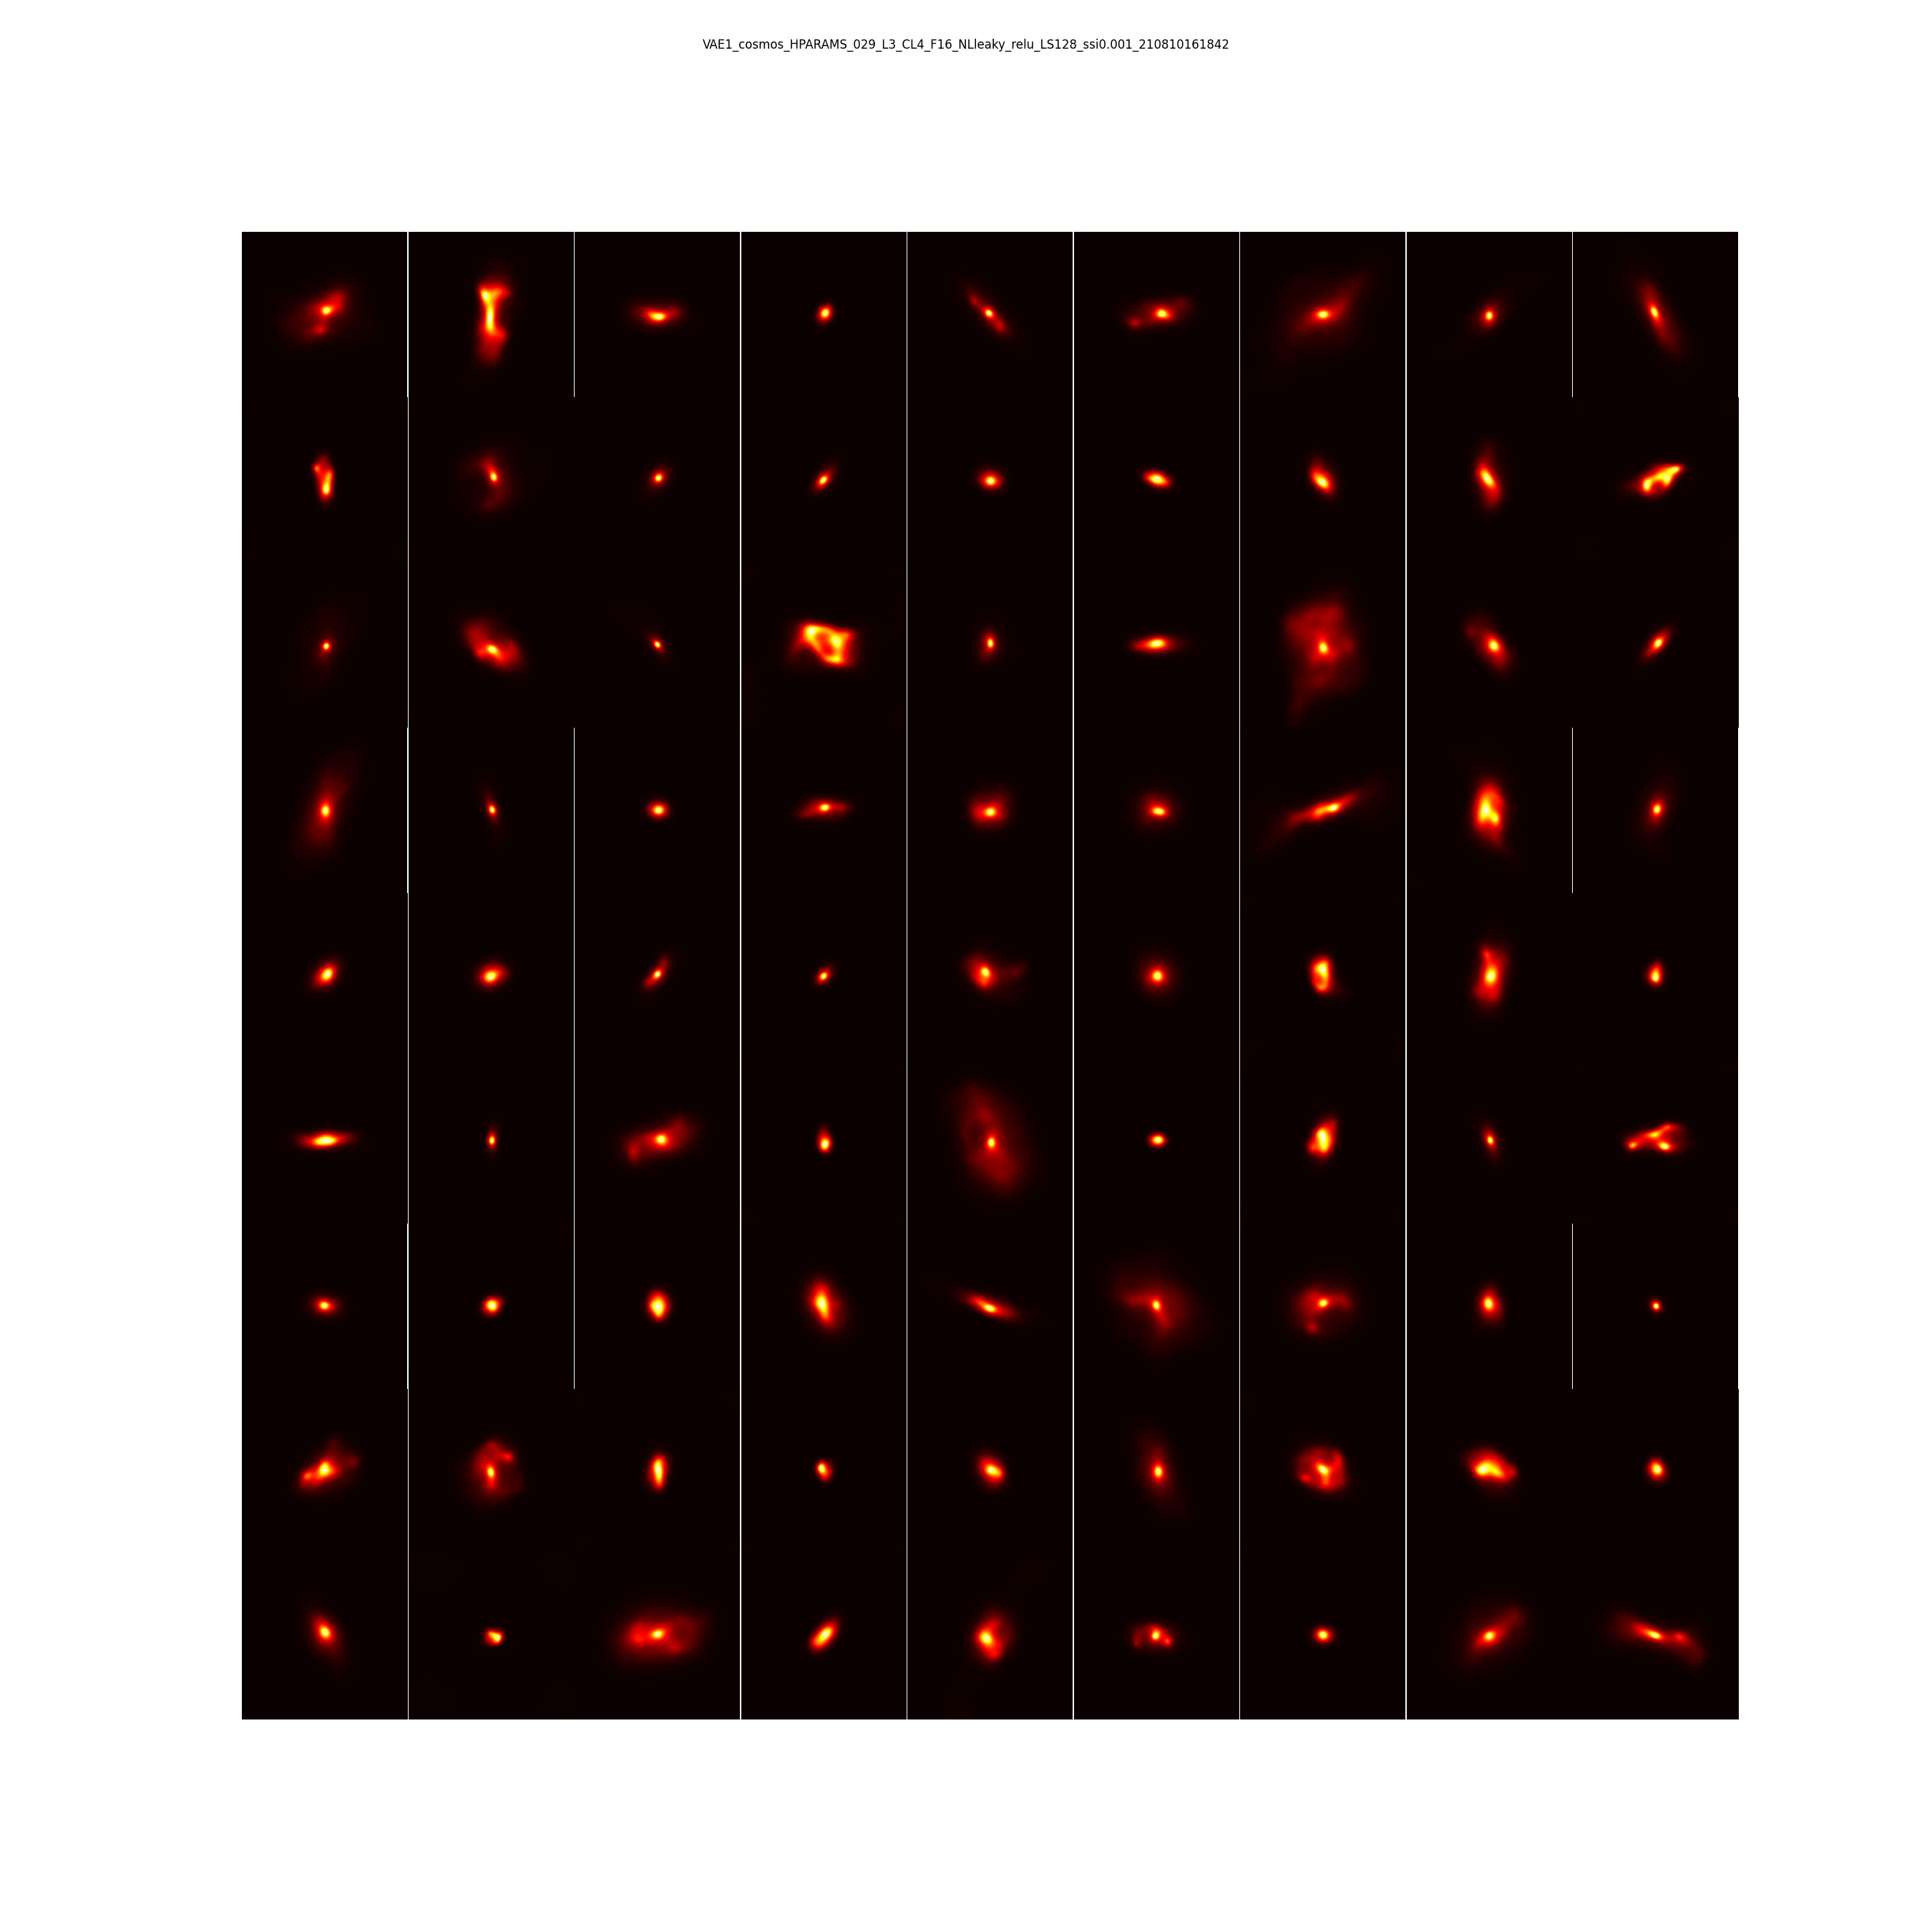

In [51]:
Image(filename = path + "vae_sampling_VAE1_cosmos_HPARAMS_029_L3_CL4_F16_NLleaky_relu_LS128_ssi0.001_210810161842__01.png", width=2000, height=2000)

# Kappa VAE First stage

In [19]:
hparams = pd.read_csv(os.path.join(result_dir, "RVAE1_kap_HPARAMS.csv"), index_col=0)
histories = {}
for file in hparams["experiment_id"]:
    histories.update({file: pd.read_csv(os.path.join(result_dir, file + ".csv"), index_col=0).to_dict()})
hparams.sort_values(by="val_cost")

,layers,res_blocks_in_layer,conv_layers_per_block,filter_scaling,filters,kernel_size,res_architecture,activation,dropout_rate,batch_norm,latent_size,batch_size,total_items,optimizer,initial_learning_rate,decay_rate,beta_cyclical,skip_strength_decay_power,l2_bottleneck_decay_power,seed,experiment_id,train_cost,val_cost,best_score
7,3,4,2,2.0,32,3,full_pre_activation,leaky_relu,NaN,0,128,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_007_L3_RB4_NLleaky_relu_LS128_210810162444,32.921177,51.565870,3.324776e+01
11,3,4,2,2.0,32,3,full_pre_activation,bipolar_relu,NaN,0,512,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_011_L3_RB4_NLbipolar_relu_LS512_210810162500,37.871254,52.110030,3.824431e+01
9,3,4,2,2.0,32,3,full_pre_activation,bipolar_relu,NaN,0,64,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_009_L3_RB4_NLbipolar_relu_LS64_210810162436,30.133207,53.111153,2.960739e+01
5,3,3,2,2.0,32,3,full_pre_activation,bipolar_relu,NaN,0,512,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_005_L3_RB3_NLbipolar_relu_LS512_210810162441,37.479996,57.044500,3.732688e+01
1,3,3,2,2.0,32,3,full_pre_activation,leaky_relu,NaN,0,128,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_001_L3_RB3_NLleaky_relu_LS128_210810162328,35.069984,57.805477,3.514446e+01
16,4,3,2,2.0,32,3,full_pre_activation,bipolar_relu,NaN,0,128,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_016_L4_RB3_NLbipolar_relu_LS128_210810162802,33.955746,59.687820,3.414485e+01
8,3,4,2,2.0,32,3,full_pre_activation,leaky_relu,NaN,0,512,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_008_L3_RB4_NLleaky_relu_LS512_210810162452,43.688860,61.424664,4.400076e+01
4,3,3,2,2.0,32,3,full_pre_activation,bipolar_relu,NaN,0,128,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_004_L3_RB3_NLbipolar_relu_LS128_210810162429,33.270800,63.772740,3.217394e+01
6,3,4,2,2.0,32,3,full_pre_activation,leaky_relu,NaN,0,64,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_006_L3_RB4_NLleaky_relu_LS64_210810162452,32.423950,76.407510,3.246217e+01
22,4,4,2,2.0,32,3,full_pre_activation,bipolar_relu,NaN,0,128,20,20000,Adam,0.0001,0.5,0,0.5,0.5,NaN,RVAE1_kap_HPARAMS_022_L4_RB4_NLbipolar_relu_LS128_210810162737,37.747017,89.814360,3.780668e+01
